In [1]:
import numpy as np
from mvlearn.embed import GCCA

from scipy.sparse.linalg import svds
from scipy.linalg import svd

import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

from pathlib import Path
import pandas as pd

%load_ext lab_black

In [10]:
def get_sim_data(col1, col2, n=10, m=20):
    data = np.random.normal(0,1,(n,m))
    
    data[:,col1] = np.arange(0,n)
    data[:,col2] = np.arange(0,n)*2
    
    return data

In [19]:
Xs = [get_sim_data(1,2), get_sim_data(2,3)]

In [26]:
gcca = GCCA(n_components = 1)
gcca = gcca.fit(Xs)

In [27]:
gcca.projection_mats_[0].shape

(20, 1)

In [28]:
gcca.projection_mats_

[array([[-0.0167737 ],
        [-0.16034433],
        [-0.28754872],
        [ 0.06550679],
        [ 0.01815778],
        [ 0.04519624],
        [ 0.04373693],
        [-0.02680102],
        [ 0.15786245],
        [ 0.09678667],
        [-0.03457784],
        [-0.01789577],
        [ 0.15394803],
        [ 0.03327183],
        [ 0.12870555],
        [-0.02268031],
        [ 0.02644803],
        [-0.01531168],
        [-0.17990159],
        [-0.00778536]]), array([[-0.09759915],
        [-0.13269796],
        [-0.15152918],
        [-0.3159278 ],
        [ 0.18449338],
        [ 0.10773194],
        [ 0.12490782],
        [ 0.13253195],
        [ 0.01529562],
        [ 0.01977448],
        [ 0.09864517],
        [ 0.03090167],
        [ 0.027295  ],
        [-0.04816371],
        [-0.03887536],
        [ 0.00033623],
        [ 0.06146059],
        [-0.03983715],
        [-0.0976954 ],
        [ 0.11895185]])]

In [33]:
svds(Xs[0], k=1)

(array([[-0.00132594],
        [ 0.06532314],
        [ 0.11685842],
        [ 0.17964197],
        [ 0.24097135],
        [ 0.2939599 ],
        [ 0.35318609],
        [ 0.41379303],
        [ 0.47378104],
        [ 0.53375166]]),
 array([37.97289882]),
 array([[-0.04049051,  0.44456263,  0.88912526, -0.02299431, -0.00522108,
         -0.01891121, -0.00513678,  0.00891988, -0.01680854, -0.04145567,
         -0.03284736, -0.01936701,  0.01570919,  0.01599571, -0.01362291,
          0.02640933, -0.00338858, -0.03839925, -0.03013136,  0.04389293]]))

In [69]:
cov = Xs[1].T @ Xs[1]

In [70]:
U,D,V = svd(cov)

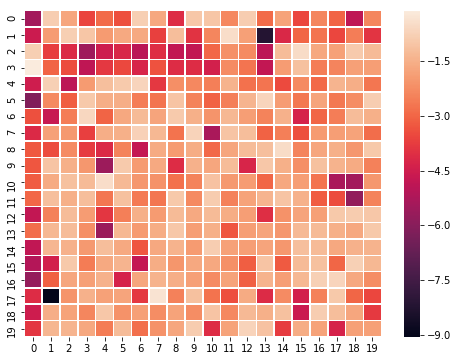

In [71]:
plt.figure(figsize=(8,6))
sns.heatmap(np.log(np.abs(U)), linewidth=0.5)
plt.show()

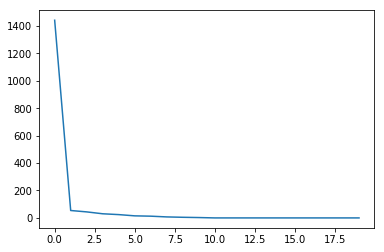

In [44]:
plt.plot(np.arange(len(D)), D)

## m >> n overfits

In [20]:
def get_data(n=10,m=100):
    return(np.random.normal(0,1,(n,m)))

In [67]:
Xs = [get_data(m=3), get_data(m=200)]

In [70]:
gcca = GCCA(n_components=3)
Xs_hat = gcca.fit_transform(Xs)

In [71]:
corrs = [np.corrcoef((Xs_hat[0][:,i], Xs_hat[1][:,i]))[1,0] for i in range(Xs_hat[0].shape[1])]

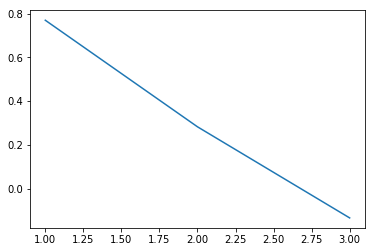

In [72]:
plt.plot(np.arange(1,Xs_hat[0].shape[1]+1), corrs)

## Check Satterthwaite Data

In [4]:
data_dir = Path("/mnt/c/Users/Ronan Perry/Documents/JHU/jovo-lab/multiview/data")
embed_dir = data_dir / "embedding"

In [7]:
timestamp = "336-11_19"
proj_mat_files = [
    f"fmri_gcca-n=852_T={timestamp}.csv",
    f"sc_gcca-n=852_T={timestamp}.csv",
    f"clinical_gcca-n=852_T={timestamp}.csv",
]

In [8]:
proj_mats = [np.genfromtxt(embed_dir / file, delimiter=",") for file in proj_mat_files]

In [9]:
proj_mats = np.array(proj_mats)

In [10]:
proj_mats.shape

(3, 852, 2)

In [11]:
np.corrcoef(proj_mats[:, :, 0])

array([[1.        , 0.21774818, 0.15647949],
       [0.21774818, 1.        , 0.24578304],
       [0.15647949, 0.24578304, 1.        ]])

In [12]:
np.corrcoef(proj_mats[:, :, 1])

array([[1.        , 0.11998789, 0.04206317],
       [0.11998789, 1.        , 0.09776035],
       [0.04206317, 0.09776035, 1.        ]])